<a href="https://colab.research.google.com/github/PPatrickGU/ROB311/blob/master/TP1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ROB311 TP1** 

**Writing the algorithm of KNN from scratch and verifying it with two data sets** 

*Author: Yan CHEN & Dajing GU*

**1)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
# Assign the name of the attributes
attribute_names = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
         'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data_path = "./breast-cancer-wisconsin.data"

# Read dataset to Dataframe of Pandas
dataset = pd.read_csv(data_path, names=attribute_names)


# Eliminating the line of '?'
print('Size before eliminating :', dataset.shape) # Shape before
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(axis=0, how='any', inplace=True)
print('Size after eliminating :', dataset.shape) # Shape after

# Display the data
dataset.head()


Size before elinating : (699, 10)
Size after elinating : (683, 10)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Seperate the features and the targets
X = dataset.iloc[:, :-1] # Features
y = dataset.iloc[:, -1] # Targets

# Split up training data and test data with the percentage respectively 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

print('training data size: ', X_train.shape)
#print(X_train)
print('test data size: ', X_test.shape)
#X_test

training data size:  (409, 9)
test data size:  (274, 9)


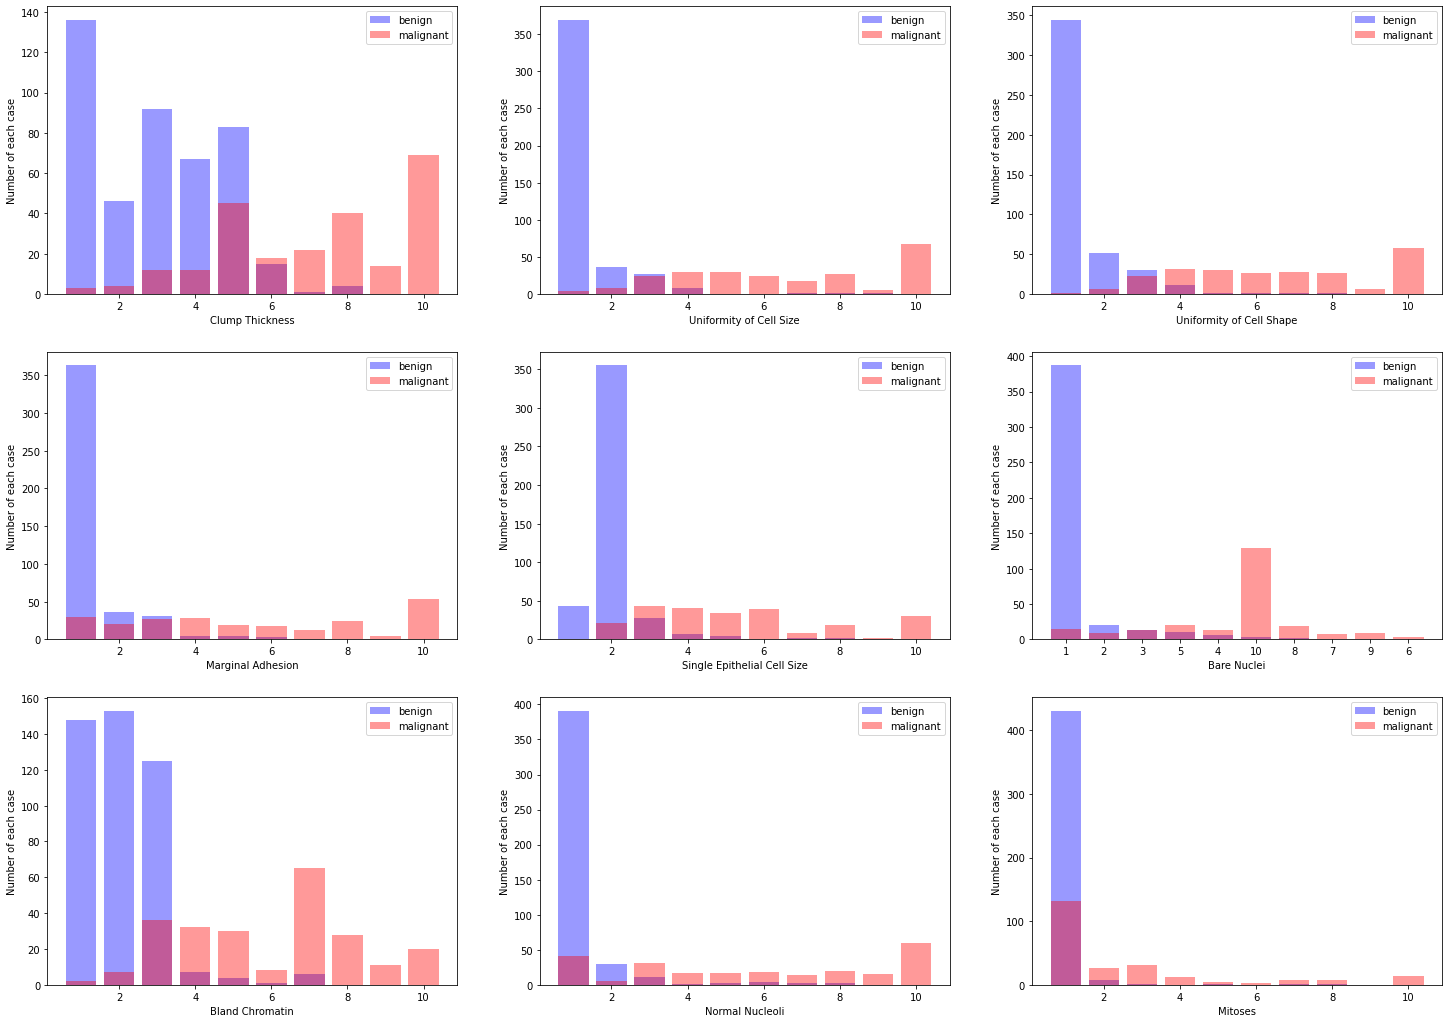

In [ ]:
fig = plt.figure(figsize=(25, 18))
for i in range(9):
    plt.subplot(3, 3, i+1)  
    plt.ylabel('Number of each case')
    plt.xlabel(attribute_names[i]) 
    
    value_list_2 = []  
    count_list_2 = [] 

    values_2 = [item_x for item_x, item_y in zip(X.iloc[:, i].T, y) if int(item_y) == 2]

    value_count_pair = pd.value_counts(values_2)  
    for k in dict(value_count_pair):     # separate the features' values and their numbers respectively
        value_list_2.append(k)
        count_list_2.append(value_count_pair[k])
    plt.bar(value_list_2, count_list_2, alpha=0.4, label='benign', fc='b')  # plot histograms of benign cancer
    
    # repeat above step for malignant cancer
    value_list_4 = []
    count_list_4 = []
    values_4 = [item_x for item_x, item_y in zip(X.iloc[:, i].T, y) if int(item_y) == 4]
    value_count_pair = pd.value_counts(values_4)
    for i in dict(value_count_pair):
        value_list_4.append(i)
        count_list_4.append(value_count_pair[i])
    plt.bar(value_list_4, count_list_4, alpha=0.4, label='malignant', fc='r')  

    plt.legend()


In [ ]:
def euclideanDistance(instance1, instance2, length):
  distance = 0
  for i in range(length):
    distance += pow((float(instance1[i]) - float(instance2[i])), 2)
  return math.sqrt(distance)

# a = np.array([[1,1,1])
# b = np.array([0,0,0])
# print(euclideanDistance(a,b,3))

def getNeighbors(X_train, X_test, k):
  distances = []
  length = X_test.shape[0]-1
  for i in range(len(X_train)):
    dist = euclideanDistance(X_test, X_train[i], length)
    distances.append(dist)
  order = np.argsort(distances)
  neighbors = order[:k]
  return neighbors # list of the neighbors' index 

#print(getNeighbors([[3,3,3],[4,4,4]], [5,5,5], 2))

def getResponse(neighbors, y_train):
  classVotes = {}
  for i in range(len(neighbors)):
    response = y_train[neighbors[i]]
    if response in classVotes:
      classVotes[response] += 1
    else:
      classVotes[response] = 1  
  sortedVotes = sorted(classVotes.items(), key=lambda item:item[1], reverse=True) 
  # print(sortedVotes)
  return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(testSet.shape[0]):
    if testSet[x] == predictions[x]:
      correct += 1
      return (correct/float(testSet.shape[0])) * 100.0 


In [ ]:

class_list = []        # a list used to store all predicted classification result
K = 10                  # define K parameter

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

for test_sample in X_test:
    neighbors = getNeighbors(X_train, test_sample, K)
    #print(neighbors)
    res = getResponse(neighbors, y_train)
    class_list.append(res)
print('done')

class_list = np.array(class_list)
print(getAccuracy(y_test, class_list)) #some question about this result, perhaps need to be normalized

done
0.36496350364963503


Normalized confusion matrix
[[0.97191011 0.02808989]
 [0.02083333 0.97916667]]


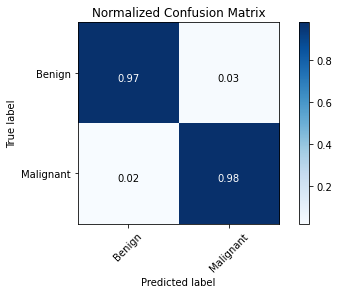

In [ ]:

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment='top',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  
    
cm = confusion_matrix(y_test, class_list)
class_names = ['Benign', 'Malignant']
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')